In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

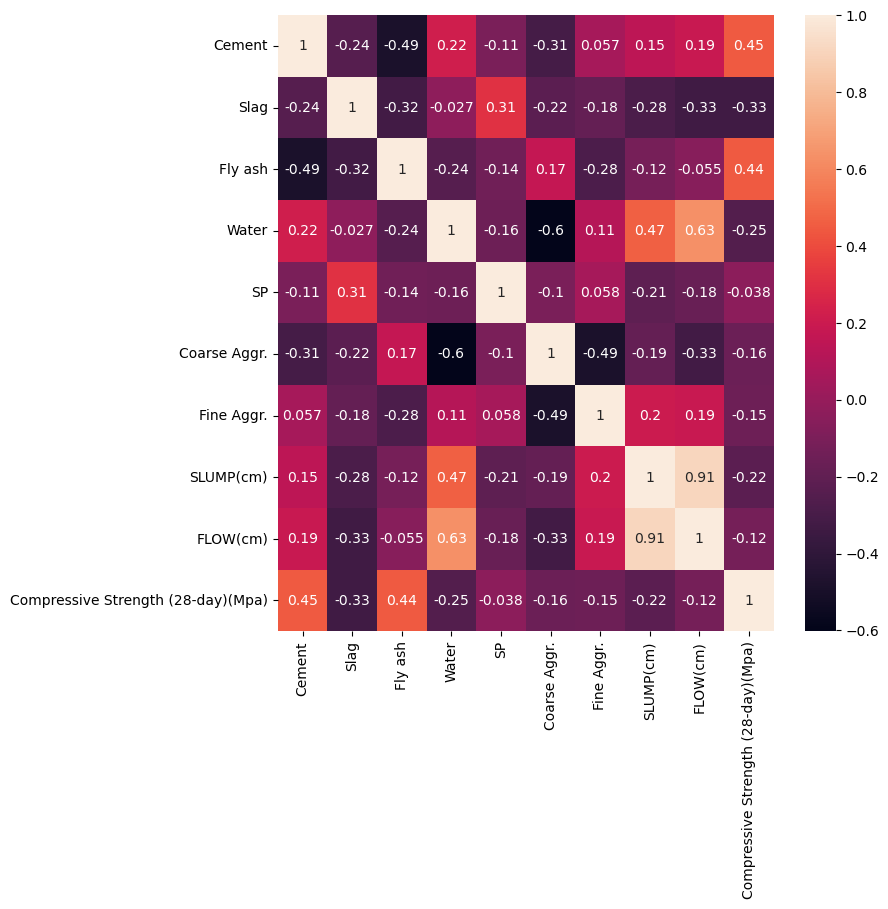

In [10]:
plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(df.corr(),annot=True)

In [11]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [12]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [13]:
y = df['Compressive Strength (28-day)(Mpa)']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)

In [26]:
scaled_X_test = scaler.transform(X_test)

In [27]:
from sklearn.svm import SVR,LinearSVR

In [28]:
base_model = SVR()

In [29]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [30]:
base_preds = base_model.predict(scaled_X_test)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [33]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327134

In [34]:
y_test.mean()

36.26870967741935

In [35]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],
             'gamma':['scale','auto'],
             'degree':[2,3,4],
             'epsilon':[0,0.01,0.1,0.5,1,2]}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
svr = SVR()

In [38]:
grid = GridSearchCV(svr,param_grid)

In [39]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [40]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [41]:
grid_preds = grid.predict(scalad_X_test) 

In [42]:
mean_absolute_error(y_test,grid_preds)

2.5128012210762005

In [43]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.178210305119844